In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans, DBSCAN , AgglomerativeClustering
from string import ascii_letters
import matplotlib.cm as cm
import hdbscan
from ipywidgets import interact
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

### PART 1

In [2]:
# importing dataset

df = pd.read_csv('c12 s9 hac insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# finding out the no of columns and rows 

df.shape

(1338, 7)

In [4]:
# description of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# checking null values, if any

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

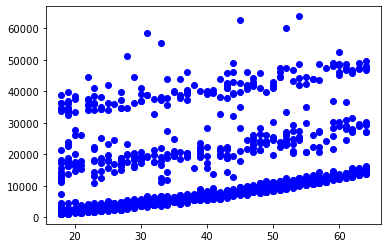

In [6]:
# by the help of a scatter plot trying to eloborate the data

plt.scatter(df.age, df.charges, color = 'blue');

##### according to the scatter plot created from age and charges columns it may be said there are roughly three clusters, and may be a few outliers.

### PART 2

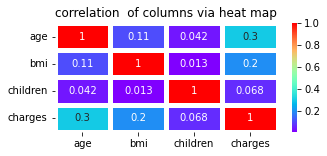

In [7]:
# heap map will show the correlation of columns

fig, ax = plt.subplots(figsize = (5, 2))
sns.heatmap(df.corr(), cmap = 'rainbow', annot = True, linewidth = 5).set_title('correlation  of columns via heat map')
plt.show()

##### correlation between BMI and charges is 0.2, which is although positive, yet very low.

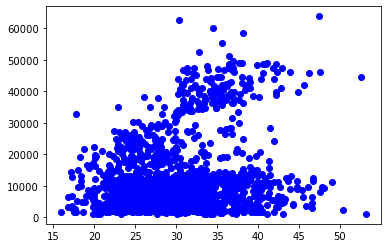

In [8]:
# scatter plot for bmi and charges

plt.scatter(df.bmi, df.charges, color = 'blue');

##### correlation between BMI  and age is 0.11, which is although positive yet very low.

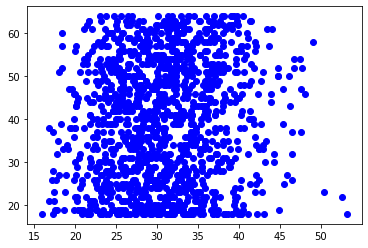

In [9]:
# scatter plot for bmi and age

plt.scatter(df.bmi, df.age, color = 'blue');

##### correlation between age and charges is 0.3, which is although positive yet higher as compared to above two correlations.

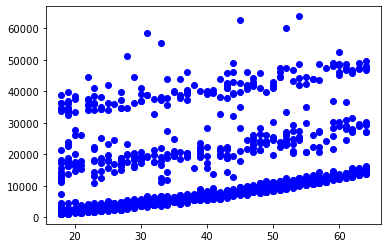

In [10]:
# scatter plot for age and charges

plt.scatter(df.age, df.charges, color = 'blue');

In [11]:
# finding maximum value in charges column, to be used to bin.

df['charges'].max()

63770.42801

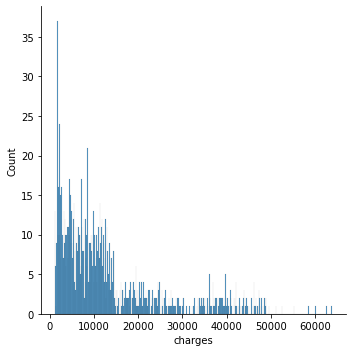

In [12]:
# distribution of charges

sns.displot(df, x = 'charges', bins = 500);

In [13]:
# finding maximum value in bmi column, to be used to bin.

df['bmi'].max()

53.13

In [14]:
# creating bins for bmi and adding the same to dataframe

bins = [0, 18.5, 25, 30, 53.13]
slot = ['UNDER_WEIGHT',
        'NORMAL_WEIGHT',
        'OVER_WEIGHT',
        'OBESE']

df['bmi_slots'] = pd.cut(df['bmi'], bins = bins,labels = slot)

df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_slots
0,19,female,27.900,0,yes,southwest,16884.92400,OVER_WEIGHT
1,18,male,33.770,1,no,southeast,1725.55230,OBESE
2,28,male,33.000,3,no,southeast,4449.46200,OBESE
3,33,male,22.705,0,no,northwest,21984.47061,NORMAL_WEIGHT
4,32,male,28.880,0,no,northwest,3866.85520,OVER_WEIGHT


In [15]:
# Get the unique values of region column
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Text(0.5, 1.0, 'region : northeast')

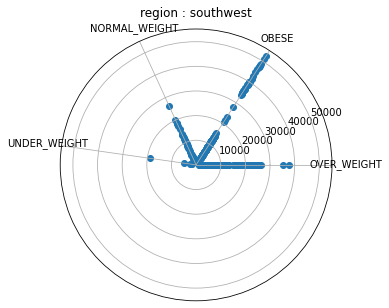

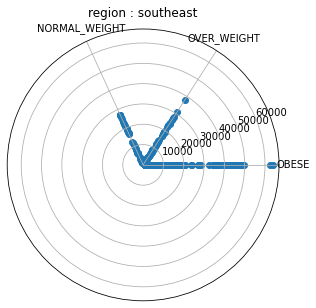

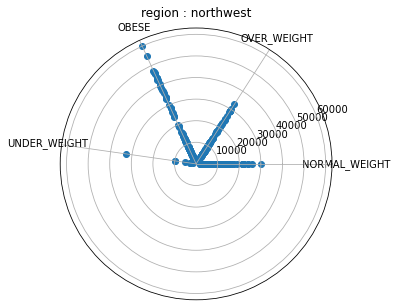

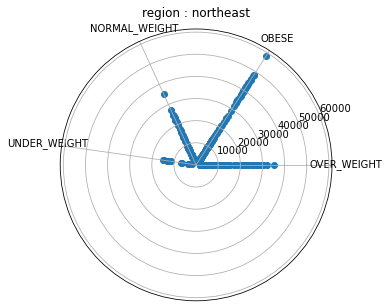

In [16]:
# analysis of bmi to charges, region wize.

df_1 = df[(df.region == 'southwest')]
               
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(projection = 'polar')
ax.scatter(df_1['bmi_slots'], df_1['charges'])
plt.title('region : southwest');

#****************************************************************

df_2 = df[(df.region == 'southeast')]
               
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(projection = 'polar')
ax.scatter(df_2['bmi_slots'], df_2['charges'])
plt.title('region : southeast');

#****************************************************************

df_3 = df[(df.region == 'northwest')]
               
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(projection = 'polar')
ax.scatter(df_3['bmi_slots'], df_3['charges'])
plt.title('region : northwest');

#****************************************************************

df_4 = df[(df.region == 'northeast')]
               
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(projection = 'polar')
ax.scatter(df_4['bmi_slots'], df_4['charges'])
plt.title('region : northeast')

##### the above polar plots shows relation between bmi_slots and charges in respect to regions.

In [17]:
# form correlation matrix

matrix = df.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


### PART 3

In [18]:
# selecting out only numeric data type

df_num = df.select_dtypes('number')
df_num.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [19]:
# standard scaler

std_scaler = StandardScaler()

df_std_scale = std_scaler.fit_transform(df_num)
df_std_scale

array([[-1.43876426, -0.45332   , -0.90861367,  0.2985838 ],
       [-1.50996545,  0.5096211 , -0.07876719, -0.95368917],
       [-0.79795355,  0.38330685,  1.58092576, -0.72867467],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, -0.96159623],
       [-1.29636188, -0.79781341, -0.90861367, -0.93036151],
       [ 1.55168573, -0.26138796, -0.90861367,  1.31105347]])

In [20]:
# converting array to dataframe

df_std_scaled = pd.DataFrame(df_std_scale)


# adding column name to the respective columns

df_std_scaled.columns =['age', 'bmi', 'children', 'charges']
print(df_std_scaled)

           age       bmi  children   charges
0    -1.438764 -0.453320 -0.908614  0.298584
1    -1.509965  0.509621 -0.078767 -0.953689
2    -0.797954  0.383307  1.580926 -0.728675
3    -0.441948 -1.305531 -0.908614  0.719843
4    -0.513149 -0.292556 -0.908614 -0.776802
...        ...       ...       ...       ...
1333  0.768473  0.050297  1.580926 -0.220551
1334 -1.509965  0.206139 -0.908614 -0.914002
1335 -1.509965  1.014878 -0.908614 -0.961596
1336 -1.296362 -0.797813 -0.908614 -0.930362
1337  1.551686 -0.261388 -0.908614  1.311053

[1338 rows x 4 columns]


### Elbow Method

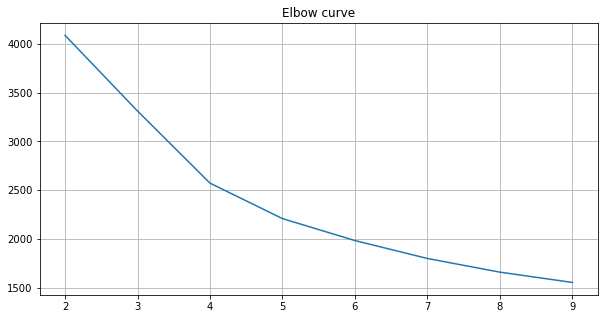

In [21]:
distorsions = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_std_scale)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize = (10, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve');

### Sillhouette Method

For n_clusters = 2 The average silhouette_score is : 0.23439977560956812
For n_clusters = 3 The average silhouette_score is : 0.25720042552658645
For n_clusters = 4 The average silhouette_score is : 0.2944245314180033
For n_clusters = 5 The average silhouette_score is : 0.28250425289434744
For n_clusters = 6 The average silhouette_score is : 0.25666241382415156
For n_clusters = 7 The average silhouette_score is : 0.26173037303727587
For n_clusters = 8 The average silhouette_score is : 0.26282449023019994


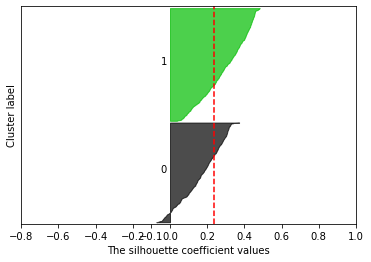

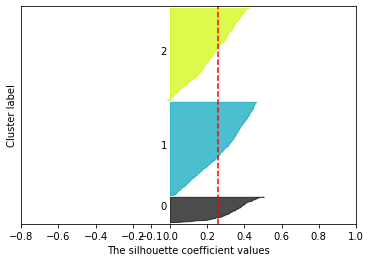

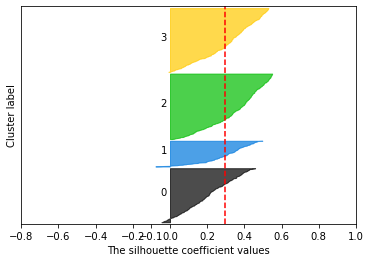

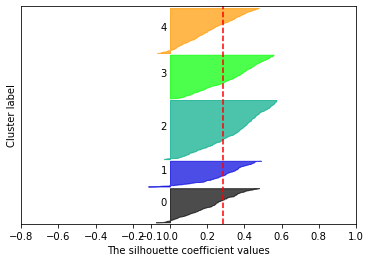

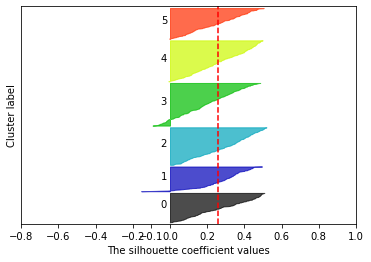

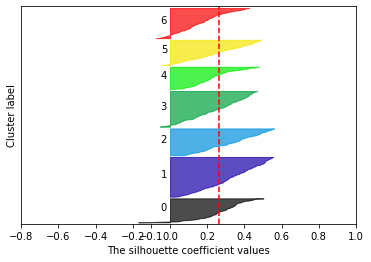

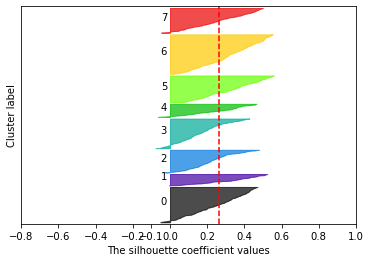

In [22]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_std_scale) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_std_scale)

    silhouette_avg = silhouette_score(df_std_scale, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_std_scale, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x = silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.8, -0.6, -0.4, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

##### from the above graphs it can be considered taht no of clusters when 3 is suitable for further analysis

### K-MEANS

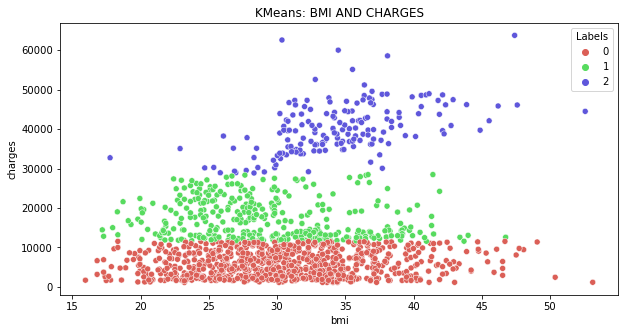

In [23]:
# BMI AND CHARGES

km = KMeans(n_clusters = 3).fit(df_num)

df_num['Labels'] = km.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot(df_num['bmi'], df_num['charges'], hue = df_num['Labels'], 
                palette=sns.color_palette('hls', np.unique(km.labels_).shape[0]))
plt.title('KMeans: BMI AND CHARGES')
plt.show()

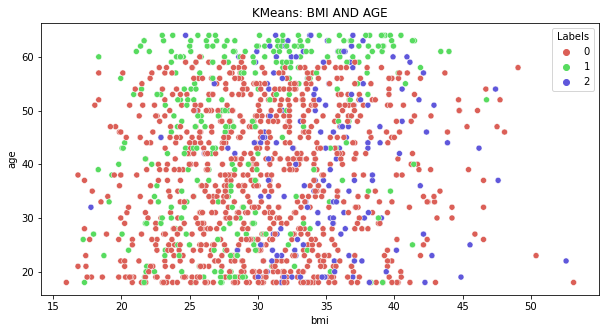

In [24]:
# BMI AND AGE

km = KMeans(n_clusters = 3).fit(df_num)

df_num['Labels'] = km.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot(df_num['bmi'], df_num['age'], hue = df_num['Labels'], 
                palette=sns.color_palette('hls', np.unique(km.labels_).shape[0]))
plt.title('KMeans: BMI AND AGE')
plt.show()

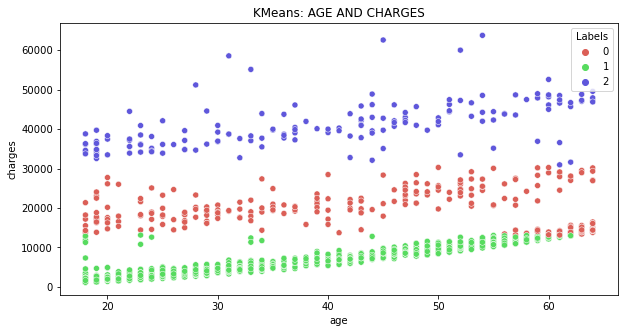

In [25]:
# AGE AND CHARGES

km = KMeans(n_clusters = 3).fit(df_num)

df_num['Labels'] = km.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot(df_num['age'], df_num['charges'], hue = df_num['Labels'], 
                palette=sns.color_palette('hls', np.unique(km.labels_).shape[0]))
plt.title('KMeans: AGE AND CHARGES')
plt.show()

### DBSCAN

In [26]:
cols = ['age', 'bmi', 'children', 'charges']
def make_dbscan(attributs=cols, scaler=MinMaxScaler(), dimension_reduction=None, perplexity = 16, components = 2,
                eps = 0.5, min_samples = 10, show='features'):
    attributs = list(attributs)
    scaled_values = scaler.fit_transform(df_std_scaled[attributs])
    
    components = min(components, len(attributs))
    if dimension_reduction == 'pca':
        values = PCA().fit_transform(scaled_values)[:, :components]
    elif dimension_reduction == 'tsne':
        values = TSNE( perplexity = perplexity).fit_transform(scaled_values)[:, :components]
    else:
        values = scaled_values
        
    
    
    cluster = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(values)
    #cluster = [cm.Dark2.colors[c] for c in cluster]
    #print('Silhouette score:', silhouette_score(scaled_values, cluster))
    print('Found', 1+np.max(cluster), 'clusters with', np.sum(cluster == -1), 'outliers')
    
    if show == 'features':
        df_plot = df_std_scaled.astype(float).copy()
    elif show == 'values':
        df_plot = pd.DataFrame(values)
    
    df_plot['cluster'] = cluster
        
    sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5}
                 , vars=[c for c in df_plot.columns if c != 'cluster'], palette = 'Accent'
                )


style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')
i = interact(make_dbscan 
            , attributs=widgets.SelectMultiple(options=cols, value=cols, rows=len(cols)
                                          ,description='Features', layout=layout, style=style
                                          ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , scaler=widgets.RadioButtons(options=[('Z-Transform', StandardScaler()), ('Min-Max', MinMaxScaler()), ('None', FunctionTransformer(validate=False))]
                                          ,description='Scaler', layout=layout, style=style
                                          ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'), ('tSNE', 'tsne'), ('without', None)]
                                                  ,description='Dimensionality Reduction'
                                                  , layout=layout, style=style
                                                  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
             , perplexity=widgets.SelectionSlider(options=range(1, 50), value=16
                                                  ,description='Perplexity'
                                                  , layout=layout, style=style
                                                  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            
             ,components=widgets.SelectionSlider(options=range(1, 5), value=4
                                                ,description='Number components'
                                                , layout=layout, style=style
                                                ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , eps=widgets.SelectionSlider(options=[.1, .25, .5, .6, .7, .8, .9, 1., 1.25, 1.5, 2.], value = .5
                                                ,description='Epsilon'
                                                , layout=layout, style=style
                                                ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , min_samples=widgets.SelectionSlider(options=range(1, 20), value=10
                                                ,description='Min. samples'
                                                , layout=layout, style=style
                                                ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , show=widgets.RadioButtons(options=[('Features', 'features'), ('Values', 'values')]
                                                  ,description='Show'
                                                  , layout=layout, style=style
                                                  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)

            )

interactive(children=(SelectMultiple(description='Features', index=(0, 1, 2, 3), layout=Layout(width='400px'),…

### Agglomerative Clustering

In [27]:
n_clusters = [3]
n_link = ['average']

AgglomerativeClustering(linkage='average', n_clusters=3)


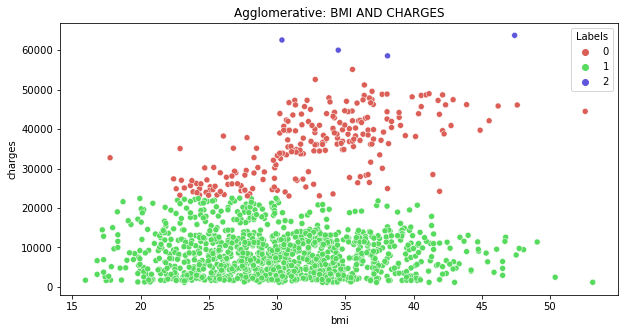

In [28]:
# BMI AND CHARGES

for c in n_clusters:
    linkage = n_link
    for l in linkage:
        model = AgglomerativeClustering(n_clusters = c, linkage = l)
        model = model.fit(df_num)
        print(model)
        df_num['Labels'] = model.labels_
        plt.figure(figsize=(10, 5))
        sns.scatterplot(df_num['bmi'], df_num['charges'], hue = df_num['Labels'], 
                palette=sns.color_palette('hls', np.unique(model.labels_).shape[0]))
        plt.title('Agglomerative: BMI AND CHARGES')
        plt.show()

AgglomerativeClustering(linkage='average', n_clusters=3)


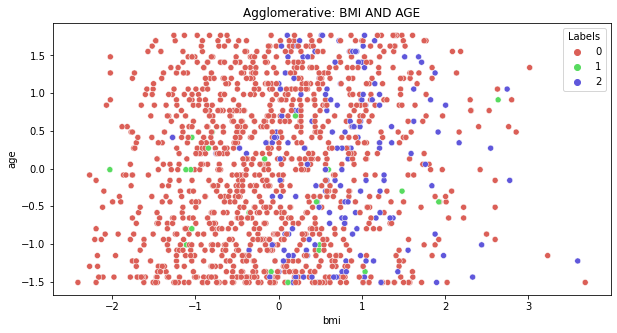

In [29]:
# BMI AND AGE

for c in n_clusters:
    linkage = n_link
    for l in linkage:
        model = AgglomerativeClustering(n_clusters = c, linkage = l)
        model = model.fit(df_std_scaled)
        print(model)
        df_std_scaled['Labels'] = model.labels_
        plt.figure(figsize=(10, 5))
        sns.scatterplot(df_std_scaled['bmi'], df_std_scaled['age'], hue = df_std_scaled['Labels'], 
                palette=sns.color_palette('hls', np.unique(model.labels_).shape[0]))
        plt.title('Agglomerative: BMI AND AGE')
        plt.show()

AgglomerativeClustering(linkage='average', n_clusters=3)


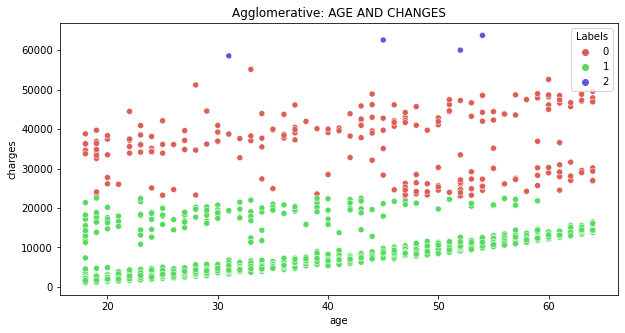

In [30]:
# AGE AND CHANGES

for c in n_clusters:
    linkage = n_link
    for l in linkage:
        model = AgglomerativeClustering(n_clusters = c, linkage = l)
        model = model.fit(df_num)
        print(model)
        df_num['Labels'] = model.labels_
        plt.figure(figsize=(10, 5))
        sns.scatterplot(df_num['age'], df_num['charges'], hue = df_num['Labels'], 
                palette=sns.color_palette('hls', np.unique(model.labels_).shape[0]))
        plt.title('Agglomerative: AGE AND CHANGES')
        plt.show()

##### from all the above algorithms it may be concluded that outliers are hard to identify, dbscan is also no exception and density may a reason fo that.
##### both k-means and agglomerative are giving near results when compared among bmi vs charges and age vs charges. bmi vs age doesnt create a good cluster.
### k-means is showing better clusters than all other.

### PART 4

In [31]:
df_a = df.drop(['bmi_slots', 'sex', 'children'], axis = 1)
df_a.head()

,age,bmi,smoker,region,charges
0,19,27.900,yes,southwest,16884.92400
1,18,33.770,no,southeast,1725.55230
2,28,33.000,no,southeast,4449.46200
3,33,22.705,no,northwest,21984.47061
4,32,28.880,no,northwest,3866.85520


In [32]:
# selecting out only numeric data type

df_num_a = df_a.select_dtypes('number')
df_num_a.head()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


In [33]:
df_scale = df_num_a

minmax=MinMaxScaler()

scale_columns = ['age', 'bmi', 'charges']
df_scale[scale_columns] = minmax.fit_transform(df_a[scale_columns])
df_scale.head()

,age,bmi,charges
0,0.021739,0.321227,0.251611
1,0.000000,0.479150,0.009636
2,0.217391,0.458434,0.053115
3,0.326087,0.181464,0.333010
4,0.304348,0.347592,0.043816


In [34]:
df_scaled = pd.DataFrame(df_scale)

In [35]:
X = df_scaled.iloc[:, 0:3]
y = df_scaled.iloc[:, -1]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 30)

In [37]:
reg_1 = LinearRegression().fit(X, y)

pred_1 = reg_1.predict(X_test)
print('the predicted values for test dependent: ', pred_1)

the predicted values for test dependent:  [6.51207736e-01 4.05032827e-02 5.78540104e-02 5.04597638e-01
 1.28058679e-01 5.77251040e-02 1.87844459e-01 4.65497879e-01
 6.16193697e-01 1.75632441e-01 8.23699952e-02 1.11651517e-01
 6.47328702e-01 1.45408400e-01 9.42325180e-03 4.13673397e-01
 1.11774878e-01 1.30569967e-01 2.79118782e-01 1.14317192e-01
 8.20226033e-03 7.35393093e-02 1.29977830e-01 1.05508963e-01
 3.58290761e-01 7.36955254e-01 1.81543167e-01 5.39272677e-02
 9.80681627e-02 1.64010590e-01 3.94629531e-02 6.93768317e-01
 2.03392084e-02 1.50966566e-01 1.75983265e-01 7.68175095e-02
 1.64806214e-02 8.40802158e-02 8.15167337e-03 7.22736728e-02
 9.06259399e-02 3.79123051e-01 2.55304679e-02 1.72752917e-01
 9.03369660e-02 6.16149452e-01 6.24020092e-02 2.41619303e-04
 1.83372358e-01 4.47557703e-02 1.18121307e-01 1.25402913e-01
 1.77369682e-01 1.47459325e-02 9.97612505e-02 1.24013486e-01
 3.40633078e-01 3.33010027e-01 1.85305565e-01 5.49464804e-02
 1.51328490e-01 7.32226077e-02 1.59041386e-

In [38]:
reg_2 = LinearRegression().fit(X, y)

pred_2 = reg_2.predict(X_train)
print('the predicted values for train dependent: ', pred_2)

the predicted values for train dependent:  [ 1.56490571e-02  5.39962741e-02  5.01893770e-02  1.66521795e-01
  2.64032754e-01  1.16334256e-01  6.96359790e-02  5.68970003e-02
  2.19504571e-02  8.84747003e-02  1.21090281e-02  8.32017550e-02
  6.80249075e-02  6.61444739e-01  2.47984072e-01  4.83309175e-02
  7.98605183e-03  1.70984128e-01 -2.64749511e-16  2.38588281e-01
  2.27255534e-01  9.82468165e-03  2.42171431e-02  6.55869315e-01
  1.05435463e-01  1.18038719e-01  1.61700077e-02  8.26338624e-03
  1.79178885e-01  9.63824335e-02  4.80740185e-02  7.56532851e-01
  3.06844975e-02  5.80116658e-01  7.63758627e-01  6.77702241e-01
  1.05473653e-01  7.36616842e-01  1.22993038e-01  3.97408639e-01
  7.39698158e-01  1.52928805e-01  7.91802967e-02  5.20535761e-01
  1.31997813e-01  6.83033577e-02  1.39635087e-01  8.17397795e-03
  1.44215767e-01  4.44201717e-01  1.31518644e-01  3.62514815e-02
  5.93164138e-01  9.31786229e-03  1.23121613e-01  3.27926770e-02
  2.56299746e-01  7.57037495e-01  1.72645317e-0

In [39]:
print("RMSE for train data: ", np.sqrt(metrics.mean_squared_error(y_train, pred_2)))
print('R2 for train data: ', metrics.r2_score(y_train, pred_2))

#*******************************************************************************************

print("RMSE for test data: ", np.sqrt(metrics.mean_squared_error(y_test, pred_1)))
print('R2 for test data: ', metrics.r2_score(y_test, pred_1))

RMSE for train data:  1.6555478081211583e-16
R2 for train data:  1.0
RMSE for test data:  1.655346165980136e-16
R2 for test data:  1.0


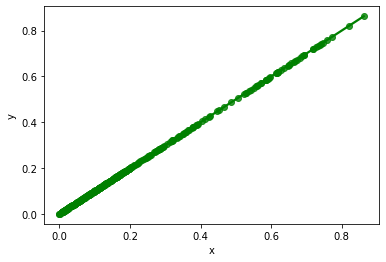

In [40]:
sns.regplot(x = pred_1, y = y_test, color = "green")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

###### improved: taking into consideration for categorical columns also, after encoding

In [41]:
encoder_1 = preprocessing.LabelEncoder()

encoder_1.fit(df_a.smoker)
print(encoder_1.classes_)
df_a.smoker = encoder_1.transform(df_a.smoker)

#*********************************************************************

encoder_2 = preprocessing.LabelEncoder()

encoder_2.fit(df_a.region)
print(encoder_2.classes_)
df_a.region = encoder_2.transform(df_a.region)

df_a.head()

['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']


,age,bmi,smoker,region,charges
0,19,27.900,1,3,16884.92400
1,18,33.770,0,2,1725.55230
2,28,33.000,0,2,4449.46200
3,33,22.705,0,1,21984.47061
4,32,28.880,0,1,3866.85520


In [42]:
df_scale = df_a

minmax=MinMaxScaler()

scale_columns = ['age', 'bmi', 'smoker', 'region', 'charges']
df_scale[scale_columns] = minmax.fit_transform(df_a[scale_columns])
df_scale.head()

,age,bmi,smoker,region,charges
0,0.021739,0.321227,1.0,1.000000,0.251611
1,0.000000,0.479150,0.0,0.666667,0.009636
2,0.217391,0.458434,0.0,0.666667,0.053115
3,0.326087,0.181464,0.0,0.333333,0.333010
4,0.304348,0.347592,0.0,0.333333,0.043816


In [43]:
df_scaled = pd.DataFrame(df_scale)

In [44]:
X = df_scaled.iloc[:, 0:4]
y = df_scaled.iloc[:, -1]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 30)

In [46]:
reg_1 = LinearRegression().fit(X, y)

pred_1 = reg_1.predict(X_test)
print('the predicted values for test dependent: ', pred_1)

the predicted values for test dependent:  [ 0.55796384  0.07369827  0.07155241  0.40083837  0.19283173  0.09565309
  0.0816873   0.13540928  0.52218871  0.17313992  0.10539464  0.14644766
  0.55518218  0.17767467  0.02520338  0.55542451  0.18147545  0.12088154
  0.43202717  0.16390833  0.02029764  0.12329318  0.10322637  0.17020328
  0.51032892  0.59402756  0.2074296   0.05355944  0.16021442  0.2182855
  0.01687322  0.47155483  0.02470319  0.2178748   0.1845144   0.11539254
  0.01778106  0.09908991  0.00819394  0.11835669  0.07897472  0.51893189
  0.04205348  0.22444318  0.14955329  0.48549904  0.07443584  0.04390826
  0.0354314   0.07402494  0.14339554  0.18493055  0.17294605  0.01858543
  0.14945635  0.09744362  0.49985699  0.05097192  0.20497805  0.06283232
  0.22848787  0.17174341  0.15003459  0.12470445 -0.01197889  0.11865322
  0.14999881 -0.0032546   0.03352408  0.22455051  0.15297212  0.03498885
 -0.01756552  0.13506843  0.22770405 -0.02441931  0.18132964  0.14273493
  0.484023

In [47]:
reg_2 = LinearRegression().fit(X, y)

pred_2 = reg_2.predict(X_train)
print('the predicted values for train dependent: ', pred_2)

the predicted values for train dependent:  [ 2.44998076e-02  7.05262597e-02  1.47266786e-01  1.72521084e-01
  4.11774786e-01  1.31671520e-01  9.56840400e-02  1.67802260e-01
  7.35432215e-02  1.14321230e-01  4.24221103e-02  1.29004175e-01
  8.66155005e-02  5.48564301e-01  4.15122821e-01  7.90069110e-02
  2.93094977e-02  1.49211674e-01 -1.39028315e-02  2.33122456e-01
  3.82537080e-01 -7.36845103e-03  3.52280136e-02  5.54598225e-01
  1.55374597e-01  1.26389695e-01  5.91303380e-02  3.49229397e-02
  2.23908991e-01  1.46691379e-01  4.74375397e-02  6.25148469e-01
  3.28740142e-02  4.46015588e-01  6.31095035e-01  5.75354044e-01
  1.11865539e-01  6.05644934e-01  1.40956812e-01  5.42905126e-02
  6.07348180e-01  1.44735182e-01  1.24306844e-01  4.22577670e-01
  2.04621394e-01  1.58750683e-01  1.66477926e-01  7.42736782e-02
  1.19673648e-01  5.77981475e-01  1.29423347e-01  5.48082039e-02
  4.94938766e-01 -1.26645334e-05  1.71720381e-01  1.94965133e-02
  3.99378914e-01  6.18384780e-01  3.37768288e-0

In [48]:
print("RMSE for train data: ", np.sqrt(metrics.mean_squared_error(y_train, pred_2)))
print('R2 for train data: ', metrics.r2_score(y_train, pred_2))

#*******************************************************************************************

print("RMSE for test data: ", np.sqrt(metrics.mean_squared_error(y_test, pred_1)))
print('R2 for test data: ', metrics.r2_score(y_test, pred_1))

RMSE for train data:  0.09822768608014805
R2 for train data:  0.742751839566733
RMSE for test data:  0.0937849593040595
R2 for test data:  0.761803658166347


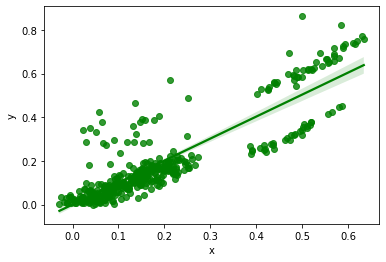

In [49]:
sns.regplot(x = pred_1, y = y_test, color = "green")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### PART 5

In [50]:
dtr = DecisionTreeRegressor(max_depth = 3,
                           min_samples_split = 5,
                           max_leaf_nodes = 15)

dtr.fit(X_train,y_train)
print("R-Squared on train dataset={}".format(dtr.score(X_test,y_test)))

dtr.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(dtr.score(X_test,y_test)))

R-Squared on train dataset=0.8324239333627083
R-Squared on test dataset=0.8557614487147029


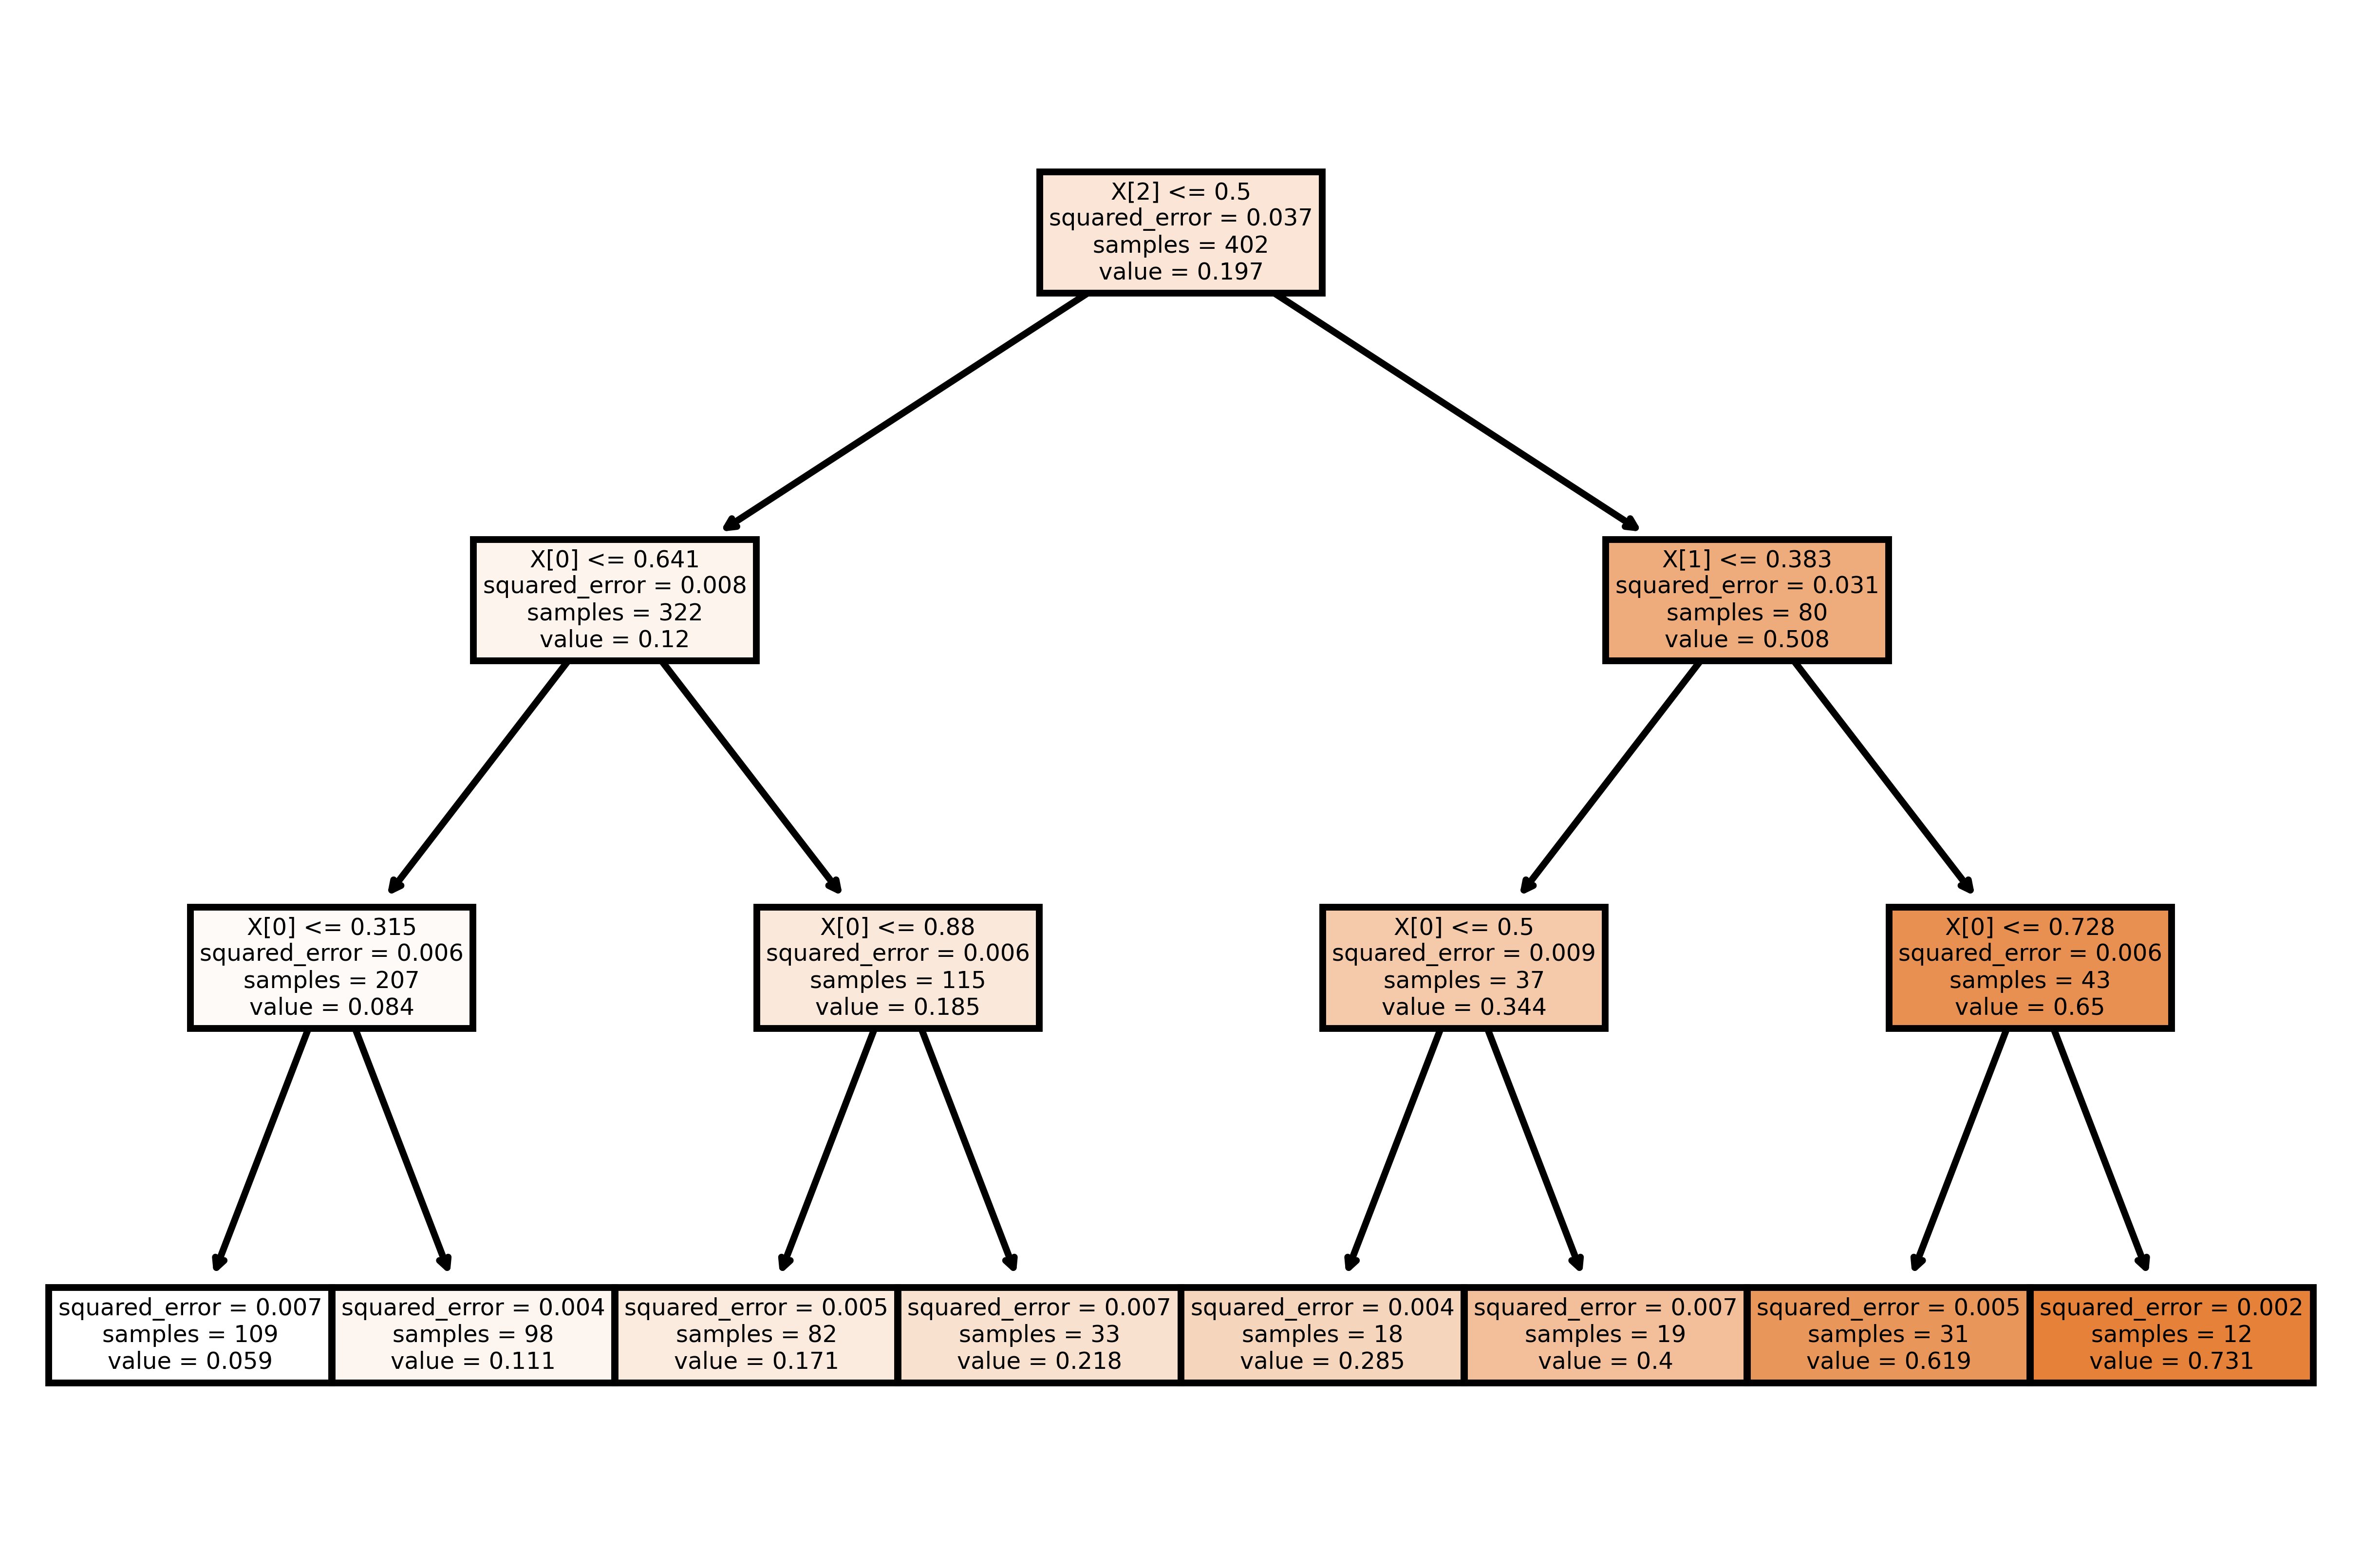

In [51]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(dpi = 1000)

tree.plot_tree(dtr,
           filled = True);

#save figure in current directory as png
fig.savefig('Decision_Tree.png')

In [52]:
df_num.head()

,age,bmi,children,charges,Labels
0,19,27.900,0,16884.92400,1
1,18,33.770,1,1725.55230,1
2,28,33.000,3,4449.46200,1
3,33,22.705,0,21984.47061,1
4,32,28.880,0,3866.85520,1


In [53]:
# Get the unique values of label column
df_num.Labels.unique()

array([1, 0, 2], dtype=int64)

In [54]:
# creating bins for labels and adding the same to dataframe

bins = [-1, 0, 1, 2]
slot = ['GOLD PACKAGE',
        'DIAMOND PACKAGE',
        'PLATINUM PACKAGE']

df_num['PACKAGE'] = pd.cut(df_num['Labels'], bins = bins, labels = slot)

df_num.head()

,age,bmi,children,charges,Labels,PACKAGE
0,19,27.900,0,16884.92400,1,DIAMOND PACKAGE
1,18,33.770,1,1725.55230,1,DIAMOND PACKAGE
2,28,33.000,3,4449.46200,1,DIAMOND PACKAGE
3,33,22.705,0,21984.47061,1,DIAMOND PACKAGE
4,32,28.880,0,3866.85520,1,DIAMOND PACKAGE


# final conclusion:

* for bmi between 15 to 50 all consumers are open for charges below 12000, exception: charges above 12000 to 30000 will only be offered to consumers with bmi between 17 to 43; also, charges between 30000 to 60000 will be offered only to bmi between 25 to 47.

* bmi and age dosent seen to go hand in hand, thus ignoring the comparision.

* with increase in age there is an increase in charges as well.

##### #the above conclusions have been drawn from k-mean algorithm.
##### #prediction file is provided hereby

In [55]:
file = df_num.to_csv('file.csv')